# Creating the database

In [1]:
import sqlite3

In [2]:
conn = sqlite3.connect('foodinfo') 
c = conn.cursor()

In [6]:
conn.commit()

In [14]:
#uses sql query to create the table
c.execute('''CREATE table food(
  name TEXT NOT NULL,
  calories INT,
  carbs INT, 
  protein REAL,
  fat REAL,
  place TEXT NOT NULL);''')


In [26]:
c.execute('''
          INSERT INTO food (name,calories,carbs,protein,fat,place)

                VALUES
                ('mcplant',429,40,19,20,'mcdonalds'),
                ('vegetable deluxe',361,51,8.8,12,'mcdonalds'),
                ('spicy veggie one',365,59,8.7,8.8,'mcdonalds'),
                ('veggie dippers 4pc',321,41,6.6,13,'mcdonalds'),
                ('mc fries med',337,42,3.3,17,'mcdonalds'),
                ('side salad',18,2.1,0.9,0.5,'mcdonalds'),
                ('cookie crumble mcflurry',356,51,6.2,14,'mcdonalds'),
                ('mc med fanta',76,18,0,0,'mcdonalds'),
                ('plant based whopper',555,55.1,24.3,27,'burger king'),
                ('vegan royale',571,52.4,17.1,30.8,'burger king'),
                ('bk fries large',382,46.3,4.9,17.8,'burger king'),
                ('vegan nuggets 6pc',243,21.5,7.9,12.9,'burger king'),
                ('onion rings 9pc',337,42,6.9,14.7,'burger king'),
                ('bk med fanta',86,20.5,0,0,'burger king'),
                ('plant patty',371,50,18,10,'subway'),
                ('veggie delite',217,43,7.6,1.3,'subway'),
                ('vegan burger',450,45.2,16.4,18,'kfc'),
                ('veggie salad',235,25.5,6,6.6,'kfc'),
                ('club orange reg',160,39,0,0,'kfc'),
                ('chocolate sundae',210,31.3,3.5,7.7,'kfc'),
               ''')
  

OperationalError: ignored

In [27]:

c.execute('''INSERT INTO food (name,calories,carbs,protein,fat,place)
            VALUES('kfc fries reg',250,35.3,3.4,12,'kfc')''')

In [11]:
import pandas as pd

In [28]:
c.execute('''
          SELECT
          *
          FROM food
          ''')

df = pd.DataFrame(c.fetchall(), columns = ['name', 'kcal', 'carb','protein','fat','place'])
print (df)

                       name  kcal  carb  protein   fat        place
0                   mcplant   429  40.0     19.0  20.0    mcdonalds
1          vegetable deluxe   361  51.0      8.8  12.0    mcdonalds
2          spicy veggie one   365  59.0      8.7   8.8    mcdonalds
3        veggie dippers 4pc   321  41.0      6.6  13.0    mcdonalds
4              mc fries med   337  42.0      3.3  17.0    mcdonalds
5                side salad    18   2.1      0.9   0.5    mcdonalds
6   cookie crumble mcflurry   356  51.0      6.2  14.0    mcdonalds
7              mc med fanta    76  18.0      0.0   0.0    mcdonalds
8       plant based whopper   555  55.1     24.3  27.0  burger king
9              vegan royale   571  52.4     17.1  30.8  burger king
10           bk fries large   382  46.3      4.9  17.8  burger king
11        vegan nuggets 6pc   243  21.5      7.9  12.9  burger king
12          onion rings 9pc   337  42.0      6.9  14.7  burger king
13             bk med fanta    86  20.5      0.0

# Analysing the data


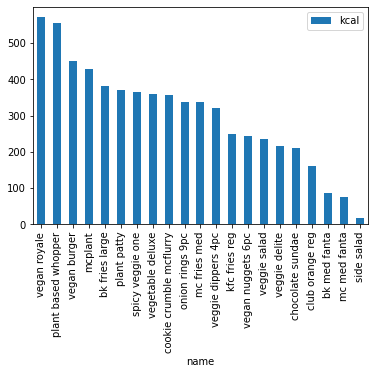

In [32]:
#bar chart of calories
df = df.sort_values("kcal",ascending=False)
df.plot(kind="bar",x="name",y="kcal")

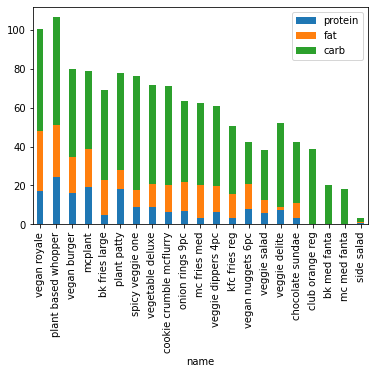

In [38]:
df2 = df[['name','protein','fat','carb']]

df2.plot(kind="bar",x="name",sort_columns=True,stacked=True,width=0.4)

In [39]:
df.to_csv('vegfastfood.csv')

In [54]:
mcdf = df.loc[df['place']=="mcdonalds"]
bkdf = df.loc[df['place']=="burger king"]
kfcdf = df.loc[df['place']=="kfc"]
subdf = df.loc[df['place']=="subway"]

In [55]:
mcdf['carb'] = (mcdf['carb']*100)/mcdf['kcal']

mcdf['protein'] = (mcdf['protein']/mcdf['kcal'])*100
mcdf['fat'] = (mcdf['fat']/mcdf['kcal'])*100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

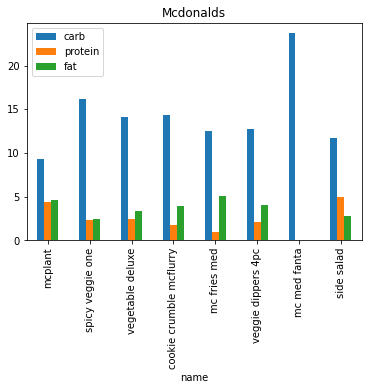

In [66]:
mcdf = mcdf[['name','carb','protein','fat']]
mcdf.plot(kind='bar',x='name',title="Mcdonalds")

In [59]:
bkdf['carb'] = (bkdf['carb']*100)/bkdf['kcal']
bkdf['protein'] = (bkdf['protein']/bkdf['kcal'])*100
bkdf['fat'] = (bkdf['fat']/bkdf['kcal'])*100

kfcdf['carb'] = (kfcdf['carb']*100)/kfcdf['kcal']
kfcdf['protein'] = (kfcdf['protein']/kfcdf['kcal'])*100
kfcdf['fat'] = (kfcdf['fat']/kfcdf['kcal'])*100
subdf['carb'] = (subdf['carb']*100)/subdf['kcal']
subdf['protein'] = (subdf['protein']/subdf['kcal'])*100
subdf['fat'] = (subdf['fat']/subdf['kcal'])*100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

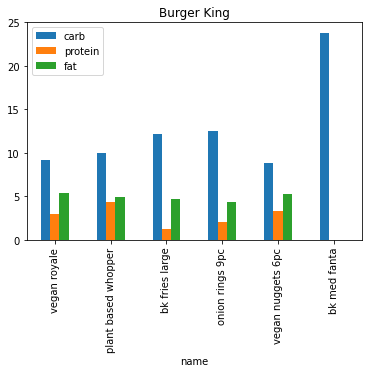

In [65]:
bkdf = bkdf[['name','carb','protein','fat']]
bkdf.plot(kind='bar',x='name',title='Burger King')

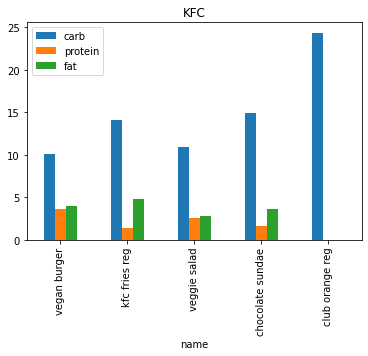

In [64]:
kfcdf = kfcdf[['name','carb','protein','fat']]
kfcdf.plot(kind='bar',x='name',title="KFC")

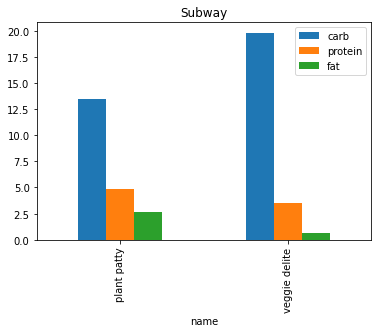

In [63]:
subdf = subdf[['name','carb','protein','fat']]
subdf.plot(kind='bar',x='name',title="Subway")